In [1]:
# Artificial Neural Network

# Installing Keras
# Enter the following command in a terminal (or anaconda prompt for Windows users): conda install -c conda-forge keras

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [2]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:] # To remove dummy variable trap

/Users/anishpillay/opt/anaconda3/envs/pyAndR/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/anishpillay/opt/anaconda3/envs/pyAndR/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [3]:
X

array([[0.0000000e+00, 0.0000000e+00, 6.1900000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 1.0000000e+00, 6.0800000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [0.0000000e+00, 0.0000000e+00, 5.0200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 7.0900000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [1.0000000e+00, 0.0000000e+00, 7.7200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [0.0000000e+00, 0.0000000e+00, 7.9200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [5]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [10]:
# Initialising the ANN
classifier = Sequential()

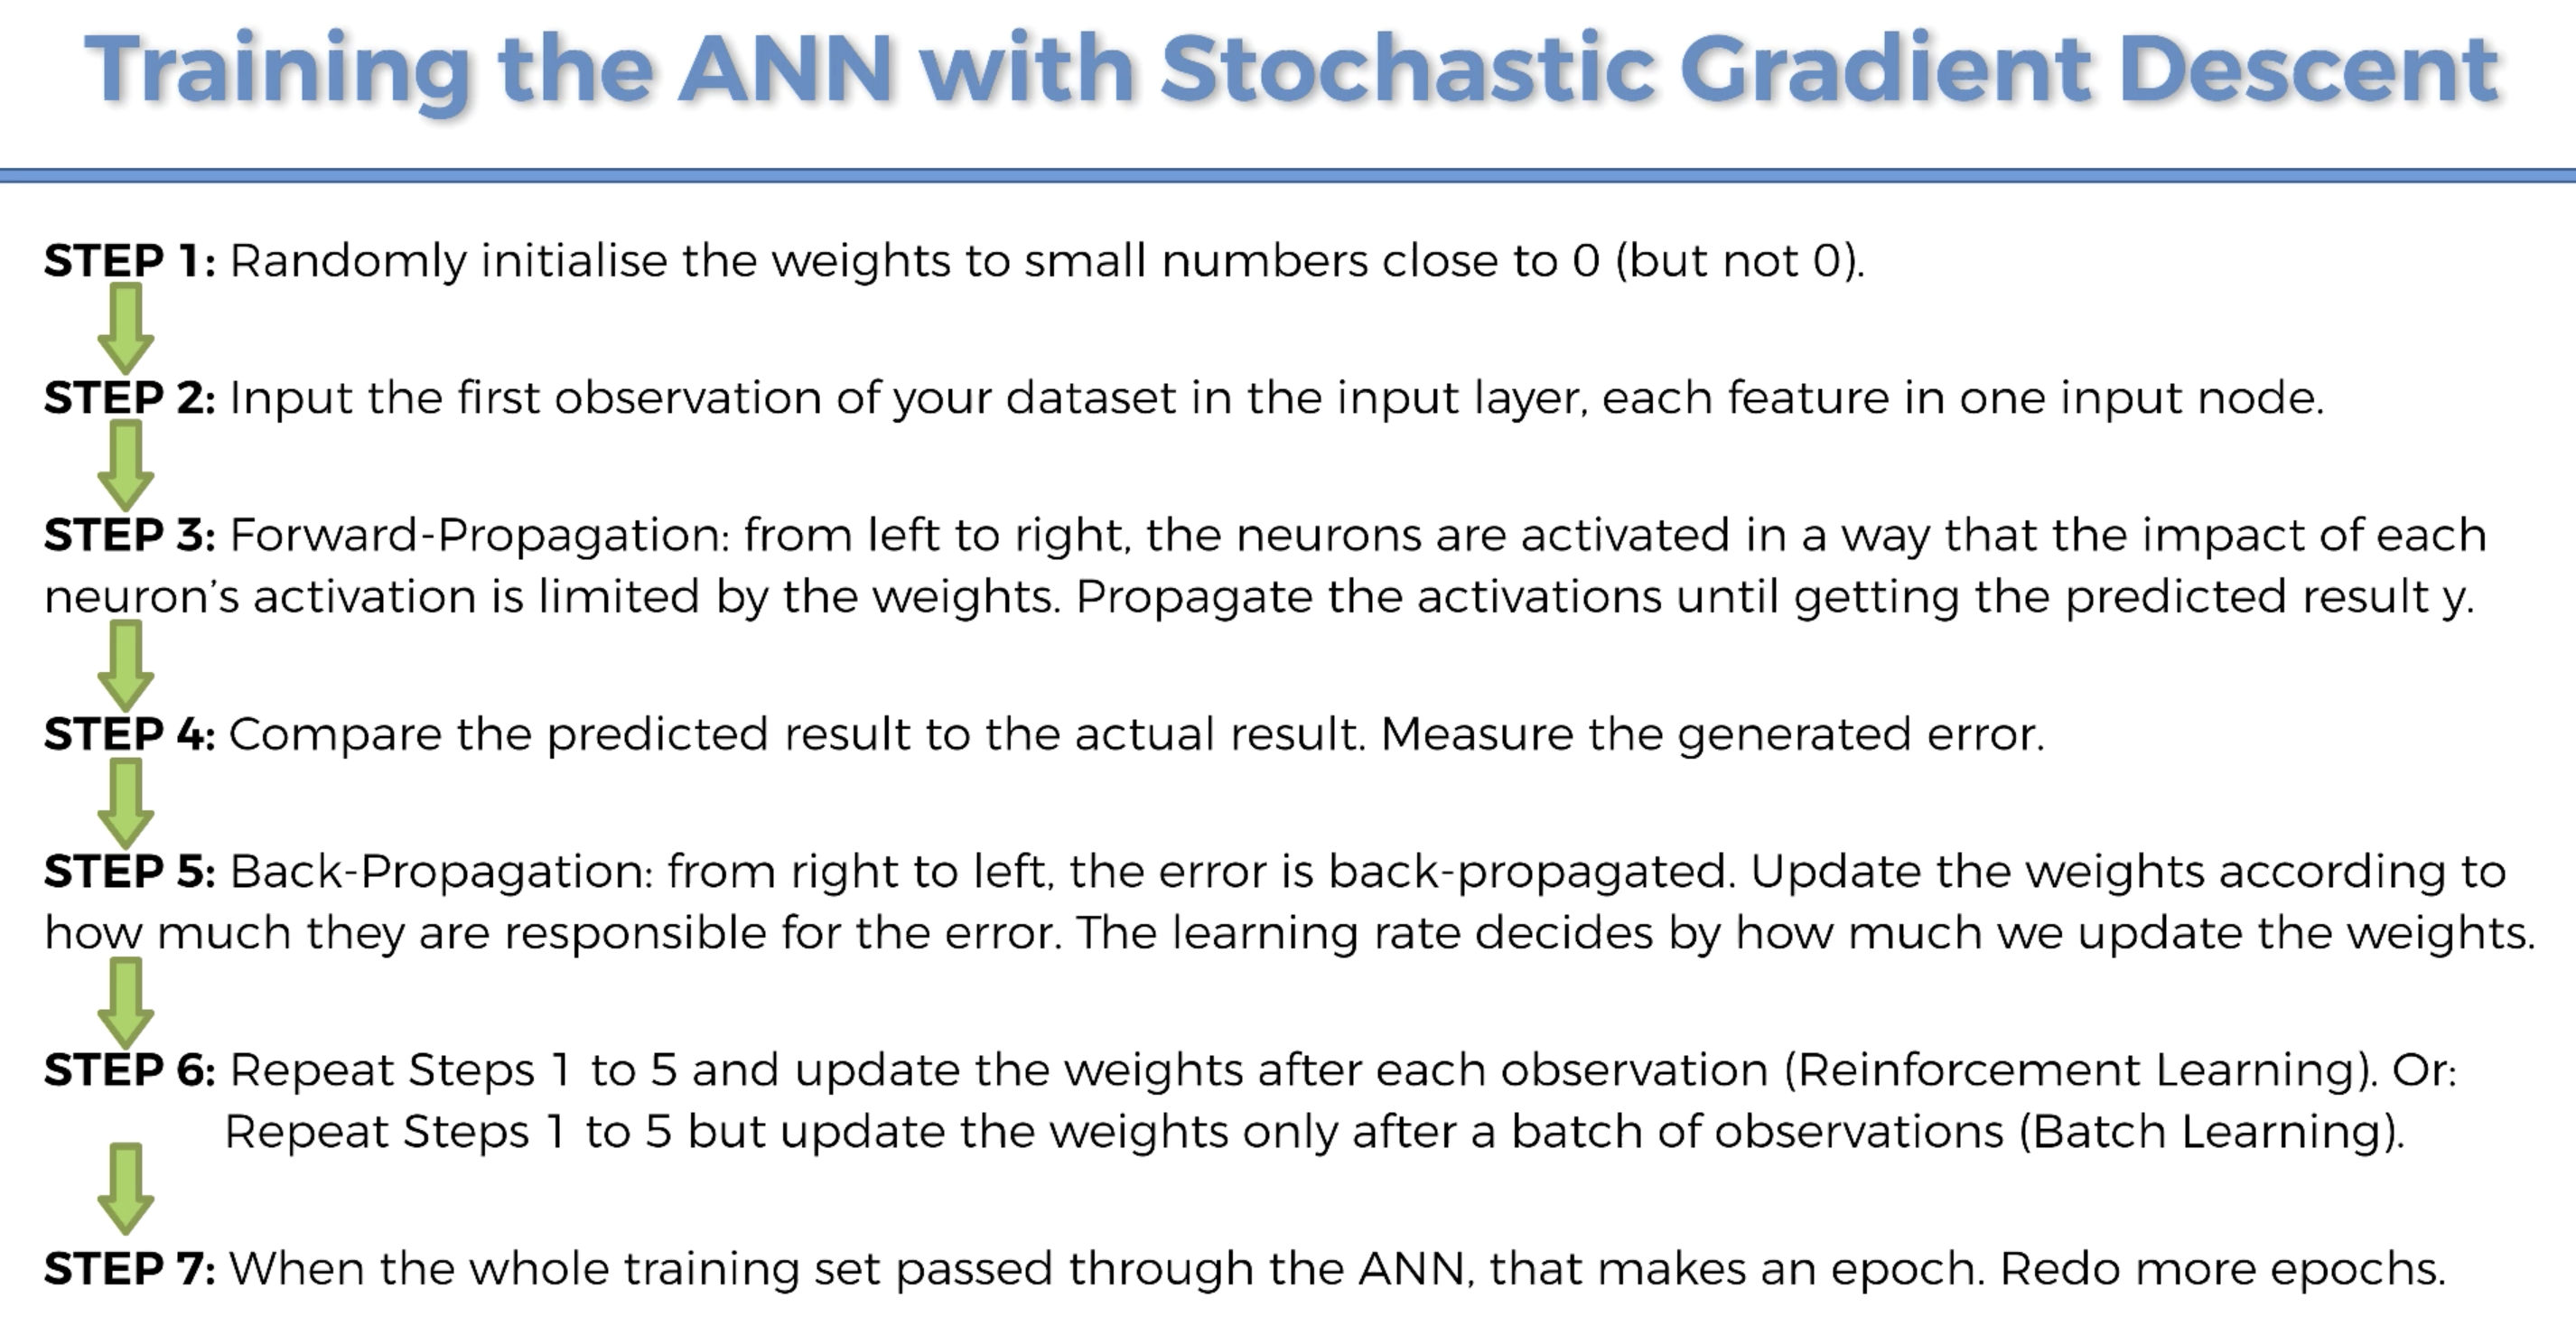

## Quick explanation of steps
Step 1: Taken care with dense library<br/>
Step 2: Each feature will be input to one input node... number of nodes = number of feature: In this case 11<br/>
Step 3: Choosing activation function, Using Rectifier activation layer for input and sigmoid activation layer for output<br/>
Step 4: Comparing predicted to output and computing error<br/>
Step 5: Update the weights based on the error and contribution of the features to this error<br/>
Step 6: Repeat steps based on Reinforcement or batch<br/>
Step 7: An epoch is complete<br/>

In [11]:
# Adding the input layer and the first hidden layer
# Tip: number of nodes in the hidden layer can be assumed as an average of input and output node (11+1)/2 = 6
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
# Tip: For output, we only want 1 node, therefore units = 1
# If you have more than 1 output variable(or the output is a classification of more than 2 possibilities),
# then units = number of output variable or possibilities and the activation function will change to softmax
# softmax is basically a sigmoid for more than 1 output variable
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# loss is basically error
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
8000/8000 [==============================] - 2s 304us/step - loss: 0.4961 - accuracy: 0.7966
Epoch 2/100
8000/8000 [==============================] - 1s 186us/step - loss: 0.4189 - accuracy: 0.8145
Epoch 3/100
8000/8000 [==============================] - 2s 200us/step - loss: 0.4107 - accuracy: 0.8199
Epoch 4/100
8000/8000 [==============================] - 2s 309us/step - loss: 0.4045 - accuracy: 0.8236
Epoch 5/100
8000/8000 [==============================] - 2s 238us/step - loss: 0.3978 - accuracy: 0.8290
Epoch 6/100
8000/8000 [==============================] - 2s 213us/step - loss: 0.3794 - accuracy: 0.8440
Epoch 7/100
8000/8000 [==============================] - 2s 227us/step - loss: 0.3588 - accuracy: 0.8560
Epoch 8/100
8000/8000 [==============================] - 2s 212us/step - loss: 0.3487 - accuracy: 0.8600
Epoch 9/100
8000/8000 [==============================] - 2s 215us/step - loss: 0.3450 - accuracy: 0.8604
Epoch 10/100
8000/8000 [==============================]

8000/8000 [==============================] - 2s 212us/step - loss: 0.3346 - accuracy: 0.8631
Epoch 76/100
8000/8000 [==============================] - 2s 206us/step - loss: 0.3338 - accuracy: 0.86410s - loss: 0.3313 - ac
Epoch 77/100
8000/8000 [==============================] - 2s 218us/step - loss: 0.3336 - accuracy: 0.8644
Epoch 78/100
8000/8000 [==============================] - 2s 205us/step - loss: 0.3335 - accuracy: 0.8648
Epoch 79/100
8000/8000 [==============================] - 2s 240us/step - loss: 0.3335 - accuracy: 0.8641
Epoch 80/100
8000/8000 [==============================] - 2s 206us/step - loss: 0.3341 - accuracy: 0.8627
Epoch 81/100
8000/8000 [==============================] - 2s 215us/step - loss: 0.3342 - accuracy: 0.86240s - loss: 0.3337 - accuracy: 
Epoch 82/100
8000/8000 [==============================] - 2s 213us/step - loss: 0.3339 - accuracy: 0.8654
Epoch 83/100
8000/8000 [==============================] - 2s 214us/step - loss: 0.3340 - accuracy: 0.8669
Epoch 8

In [12]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [13]:
cm

array([[1529,   66],
       [ 203,  202]])